In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from matplotlib.gridspec import GridSpec
from scipy.stats import norm
import scipy.stats as stats



In [91]:
df1 = pd.read_csv(r"C:\Users\clastine.LAPTOP-S2KU5R5U\Desktop\PDS-1\week3\Data\accord_sedan.csv")

#### 1. Load the data on properties of cars  into a pd dataframe

In [92]:
df1

,price,mileage,year,trim,engine,transmission
0,14995,67697,2006,ex,4 Cyl,Manual
1,11988,73738,2006,ex,4 Cyl,Manual
2,11999,80313,2006,lx,4 Cyl,Automatic
3,12995,86096,2006,lx,4 Cyl,Automatic
4,11333,79607,2006,lx,4 Cyl,Automatic
...,...,...,...,...,...,...
412,12456,67564,2006,lx,4 Cyl,Automatic
413,10995,69775,2006,ex,4 Cyl,Automatic
414,16000,77997,2006,exl,4 Cyl,Automatic
415,14700,61892,2006,ex,4 Cyl,Automatic


#### 2. Plot suitable graphs to show the distributions and help indicate outliers of priceand mileage (e.g. with boxplots) and their joint distribution (e.g. with a scatterplot)

(array([ 5., 15., 21., 60., 73., 83., 74., 45., 20., 21.]),
 array([ 19160. ,  32170.9,  45181.8,  58192.7,  71203.6,  84214.5,
         97225.4, 110236.3, 123247.2, 136258.1, 149269. ]),
 <BarContainer object of 10 artists>)

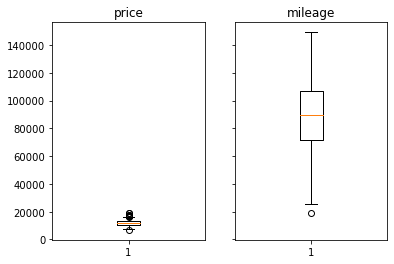

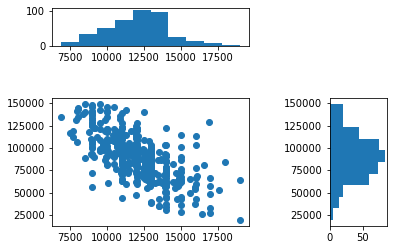

In [93]:
f1, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.boxplot(df1.price)
ax1.set_title('price')
ax2.boxplot(df1.mileage)
ax2.set_title('mileage')


f2=plt.figure()
gs=GridSpec(5,5)

ax_scatter = f2.add_subplot(gs[2:5, 0:3])
ax_hist_x = f2.add_subplot(gs[0,0:3])
ax_hist_y = f2.add_subplot(gs[2:5, 4])

ax_scatter.scatter(df1.price,df1.mileage)
ax_hist_x.hist(df1['price'])
ax_hist_y.hist(df1['mileage'], orientation = 'horizontal')


In [96]:
Q1 = np.percentile(df1.price, 25,interpolation = 'midpoint')
Q3 = np.percentile(df1.price, 75,interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

2221.0

In [97]:
upper = Q3 +1.5*IQR
lower = Q1 - 1.5*IQR

In [107]:
upperDataPoint = df1.price >= upper
lowerDataPoint = df1.price <= lower
outlierupper = np.where(lowerDataPoint)
outlierupper



(array([234], dtype=int64),)

{'whiskers': [<matplotlib.lines.Line2D at 0x29605904640>,
 'caps': [<matplotlib.lines.Line2D at 0x29605904910>,
 'boxes': [<matplotlib.patches.PathPatch at 0x29605904070>,
 'medians': [<matplotlib.lines.Line2D at 0x29605966760>,
 'fliers': [<matplotlib.lines.Line2D at 0x29605966c10>,
 'means': []}

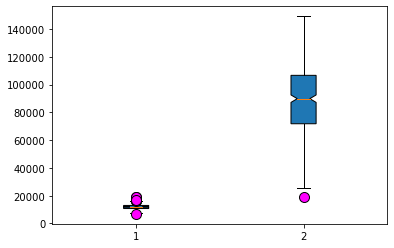

In [106]:
plt.boxplot([df1.price,df1.mileage],notch=True, patch_artist=True,flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'fuchsia'})

In [3]:
df2=pd.read_csv(r"C:\Users\clastine.LAPTOP-S2KU5R5U\Desktop\PDS-1\week3\Data\TB_burden_countries_2014-09-29 (2).csv")

In [4]:
df2

,country,iso2,iso3,iso_numeric,g_whoregion,year,e_pop_num,e_prev_100k,e_prev_100k_lo,e_prev_100k_hi,...,e_inc_tbhiv_100k,e_inc_tbhiv_100k_lo,e_inc_tbhiv_100k_hi,e_inc_tbhiv_num,e_inc_tbhiv_num_lo,e_inc_tbhiv_num_hi,source_tbhiv,c_cdr,c_cdr_lo,c_cdr_hi
0,Afghanistan,AF,AFG,4,EMR,1990,11731193,327.0,112.0,655.0,...,0.35,0.22,0.52,41.0,25.0,60.0,Model,20.0,13.0,32.0
1,Afghanistan,AF,AFG,4,EMR,1991,12612043,359.0,172.0,613.0,...,0.36,0.19,0.58,45.0,24.0,73.0,Model,97.0,77.0,120.0
2,Afghanistan,AF,AFG,4,EMR,1992,13811876,387.0,169.0,693.0,...,0.37,0.19,0.62,51.0,26.0,86.0,Model,NaN,NaN,NaN
3,Afghanistan,AF,AFG,4,EMR,1993,15175325,412.0,186.0,724.0,...,0.38,0.20,0.63,58.0,30.0,95.0,Model,NaN,NaN,NaN
4,Afghanistan,AF,AFG,4,EMR,1994,16485018,431.0,199.0,751.0,...,0.40,0.21,0.64,65.0,35.0,100.0,Model,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,Zimbabwe,ZW,ZWE,716,AFR,2008,12784041,445.0,56.0,1228.0,...,574.00,447.00,716.00,73000.0,57000.0,92000.0,Surveillance,40.0,32.0,51.0
4899,Zimbabwe,ZW,ZWE,716,AFR,2009,12888918,423.0,49.0,1192.0,...,531.00,408.00,670.00,68000.0,53000.0,86000.0,Surveillance,50.0,40.0,65.0
4900,Zimbabwe,ZW,ZWE,716,AFR,2010,13076978,438.0,70.0,1136.0,...,480.00,371.00,603.00,63000.0,48000.0,79000.0,Surveillance,53.0,43.0,69.0
4901,Zimbabwe,ZW,ZWE,716,AFR,2011,13358738,458.0,93.0,1107.0,...,433.00,335.00,543.00,58000.0,45000.0,73000.0,Surveillance,48.0,38.0,62.0


### Pick one of the columns from the Tuberculosis data and compare to a normal distribution

In [ ]:
normalized=(df2['e_prev_100k']-np.min(df2['e_prev_100k']))/(np.max(df2['e_prev_100k'])-np.min(df2['e_prev_100k']))

In [71]:
mean = np.mean(normalized)
sd=np.std(normalized)
s = np.random.normal(mean, sd,1000 )



In [85]:
abs(mean - np.mean(s)) <0.01

True

In [86]:
abs(sd - np.std(s, ddof=1)) < 0.01

True

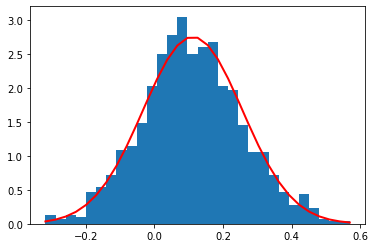

In [118]:
count, bins, ignored = plt.hist(s, 30, density=True, stacked=True)
plt.plot(bins, 1/(sd * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mean)**2 / (2 * sd**2) ),
          linewidth=2, color='r')
plt.show()

In [88]:
y_pdf = norm.pdf(df2.e_prev_100k,0,1)

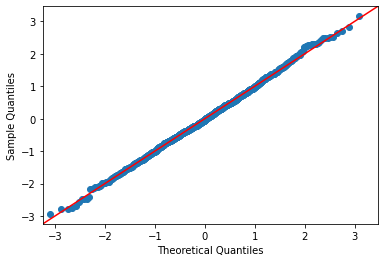

In [83]:
sm.qqplot(s, fit=True,line='45')
plt.show()

### Distributions & Sampling & Robust Statistics

In [121]:
mean = np.mean(normalized)
sd=np.std(normalized)
s1 = np.random.normal(mean, sd,5 )
s2 = np.random.normal(mean, sd*2,10 )
s3 = np.random.normal(mean, sd*4,100 )

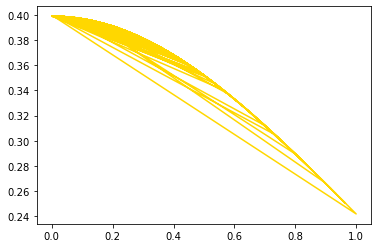

Text(0.5, 1.0, 'Normal Distributions')

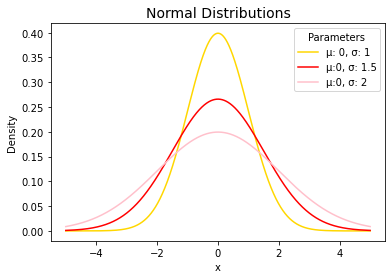

In [120]:
x = np.arange(-5, 5, 0.001)

#define multiple normal distributions
plt.plot(x, norm.pdf(x, 0, 1), label='μ: 0, σ: 1', color='gold')
plt.plot(x, norm.pdf(x, 0, 1.5), label='μ:0, σ: 1.5', color='red')
plt.plot(x, norm.pdf(x, 0, 2), label='μ:0, σ: 2', color='pink')

#add legend to plot
plt.legend(title='Parameters')

#add axes labels and a title
plt.ylabel('Density')
plt.xlabel('x')
plt.title('Normal Distributions', fontsize=14)